In [193]:
import pandas as pd 
!pip install pandas openpyxl


In [194]:
df = pd.read_excel('new dataset.xlsx')

In [195]:
df.head()

,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
0,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625


In [196]:
df.isnull().sum()

Year                    0
Month                   0
Day                     0
Weekend?               68
Hour                  225
Collision Type          6
Injury Type             0
Primary Factor       1121
Reported_Location      35
Latitude               30
Longitude              30
dtype: int64

In [197]:
df = df.dropna()

In [198]:
df.dtypes


Year                   int64
Month                  int64
Day                    int64
Weekend?              object
Hour                 float64
Collision Type        object
Injury Type           object
Primary Factor        object
Reported_Location     object
Latitude             float64
Longitude            float64
dtype: object

In [199]:
from sklearn.preprocessing import OneHotEncoder

In [200]:
ohc = OneHotEncoder(sparse_output=False)
weekend_encoded = ohc.fit_transform(df[['Weekend?']])
weekend_encoded_df = pd.DataFrame(weekend_encoded, columns=ohc.categories_[0])
df = pd.concat([df, weekend_encoded_df], axis=1)

In [201]:
df = df.drop('Weekend?', axis=1)
df = df.drop('Weekday', axis=1)

In [202]:
collision_encoded = ohc.fit_transform(df[['Collision Type']])
collision_encoded_df = pd.DataFrame(collision_encoded, columns = ohc.categories_[0])
df =  pd.concat([df, collision_encoded_df], axis = 1)

In [203]:
df = df.drop('Collision Type', axis=1)

In [204]:
injury_encoded = ohc.fit_transform(df[['Injury Type']])
injury_encoded_df = pd.DataFrame(injury_encoded, columns = ohc.categories_[0])
df =  pd.concat([df, injury_encoded_df], axis = 1)


In [205]:
df = df.drop(['Injury Type'], axis=1)

In [206]:
primary_encoded = ohc.fit_transform(df[['Primary Factor']])
primary_encoded_df = pd.DataFrame(primary_encoded, columns = ohc.categories_[0])
df =  pd.concat([df, primary_encoded_df], axis = 1)


In [207]:
df = df.drop(['Primary Factor'], axis=1)

In [208]:
df.head
df.columns
df = df.dropna()

In [209]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Year', 'Month', 'Day', 'Hour', 'Latitude', 'Longitude']])
scaled_df = pd.DataFrame(scaled_features, columns=['Year', 'Month', 'Day', 'Hour', 'Latitude', 'Longitude'])
df[['Year', 'Month', 'Day', 'Hour', 'Latitude', 'Longitude']] = scaled_df
df.head()

,Year,Month,Day,Hour,Reported_Location,Latitude,Longitude,Weekend,1-Car,2-Car,...,TOW HITCH FAILURE,TRAFFIC CONTROL INOPERATIVE/MISSING/OBSC,UNSAFE BACKING,UNSAFE LANE MOVEMENT,UNSAFE SPEED,UTILITY WORK,VIEW OBSTRUCTED,VIOLATION OF LICENSE RESTRICTION,WRONG WAY ON ONE WAY,NaN
0,1.585584,-1.615042,0.420699,-2.542555,1ST & FESS,0.299473,-0.299497,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.585584,-1.615042,0.945330,0.286064,2ND & COLLEGE,0.299680,-0.299874,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.585584,-1.615042,0.945330,1.794661,BASSWOOD & BLOOMFIELD,0.298599,-0.301302,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.585584,-1.615042,1.469960,-0.845384,GATES & JACOBS,0.300071,-0.301599,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.585584,-1.615042,1.469960,-0.468234,W 3RD,0.299997,-0.301753,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [210]:
df = df.drop('Reported_Location', axis=1)

In [211]:
df = df.loc[:, df.columns.notna()]
df = df.dropna()
df.isnull().sum()

Year                                0
Month                               0
Day                                 0
Hour                                0
Latitude                            0
                                   ..
UNSAFE SPEED                        0
UTILITY WORK                        0
VIEW OBSTRUCTED                     0
VIOLATION OF LICENSE RESTRICTION    0
WRONG WAY ON ONE WAY                0
Length: 73, dtype: int64

In [212]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

lr = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
multi_target_lr = MultiOutputClassifier(lr)

X = df.drop(['Fatal', 'Incapacitating', 'No injury/unknown', 'Non-incapacitating'], axis=1)
X.columns = X.columns.astype(str)
y = df[['Fatal', 'Incapacitating', 'No injury/unknown', 'Non-incapacitating']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

multi_target_lr.fit(X_train, y_train)

print("Training Accuracy:", multi_target_lr.score(X_train, y_train))
print("Test Accuracy:", multi_target_lr.score(X_test, y_test))


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_c

Training Accuracy: 0.7829117705636327
Test Accuracy: 0.7905795658235412


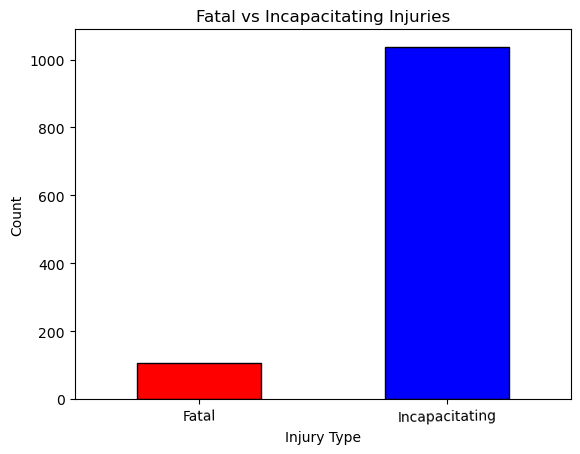

In [243]:
import matplotlib.pyplot as plt

df[['Fatal', 'Incapacitating']].sum().plot(kind='bar', color=['red', 'blue'], edgecolor='black')
plt.title('Fatal vs Incapacitating Injuries')
plt.xlabel('Injury Type')
plt.ylabel('Count')
plt.xticks([0, 1], ['Fatal', 'Incapacitating'])
plt.show()
